# Clasificacion de Flores Iris

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
iris = datasets.load_iris()
X = iris.data[:, :2]
Y = iris.target

In [10]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
h = (x_max-x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))
x_plot = np.c_[xx.ravel(), yy.ravel()]

In [14]:
c = 1.0
svc = svm.SVC(kernel="linear", C=c, decision_function_shape = 'ovr').fit(X,Y)
Ypred=svc.predict(x_plot)
Ypred=Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para flores de iris kernel lineal')

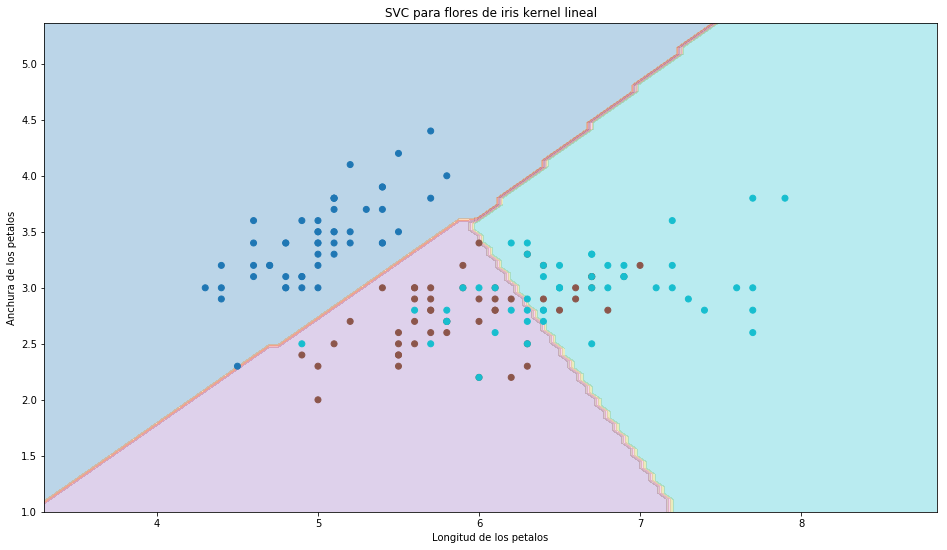

In [25]:
plt.figure(figsize=(16,9))
plt.contourf(xx, yy, Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los petalos")
plt.ylabel("Anchura de los petalos")
plt.title("SVC para flores de iris kernel lineal")

In [30]:
c = 1.0
svc = svm.SVC(kernel="rbf", C=c ,decision_function_shape = 'ovr').fit(X,Y)
Ypred=svc.predict(x_plot)
Ypred=Ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para flores de iris kernel radial')

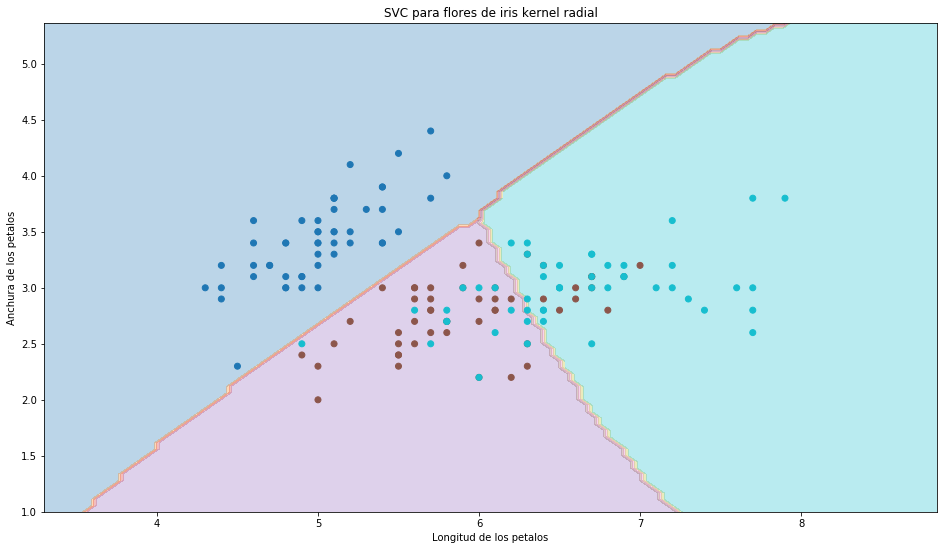

In [31]:
plt.figure(figsize=(16,9))
plt.contourf(xx, yy, Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los petalos")
plt.ylabel("Anchura de los petalos")
plt.title("SVC para flores de iris kernel radial")

In [35]:
#Grid search cros validation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle #baraja el data frame

In [36]:
#Mezcla como una baraja de cartas el dataframe
X, Y = shuffle(X, Y, random_state = 0)

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=0)

In [39]:
parameters = [
    {
        'kernel' : ['rbf'],
        'gamma'  : [1e-4, 1e-3, 1e-2, 0.1, 0.5],
        'C' : [1, 10 , 100 , 1000]
    },
    {
        'kernel' : ['linear'],
         'C' : [1, 10 , 100 , 1000]
    }
]

In [41]:
clf = GridSearchCV(svm.SVC(decision_function_shape = 'ovr'), param_grid=parameters, cv=5)
clf.fit(X,Y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [42]:
clf.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [46]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
params = clf.cv_results_['params']
for m , s, p in zip(means, stds, params ):
    print("%0.3f (+/-%0.3f) para %r" %(m, s, p))

0.747 (+/-0.062) para {'kernel': 'rbf', 'gamma': 0.0001, 'C': 1}
0.747 (+/-0.062) para {'kernel': 'rbf', 'gamma': 0.001, 'C': 1}
0.747 (+/-0.062) para {'kernel': 'rbf', 'gamma': 0.01, 'C': 1}
0.807 (+/-0.065) para {'kernel': 'rbf', 'gamma': 0.1, 'C': 1}
0.780 (+/-0.058) para {'kernel': 'rbf', 'gamma': 0.5, 'C': 1}
0.747 (+/-0.062) para {'kernel': 'rbf', 'gamma': 0.0001, 'C': 10}
0.747 (+/-0.062) para {'kernel': 'rbf', 'gamma': 0.001, 'C': 10}
0.813 (+/-0.062) para {'kernel': 'rbf', 'gamma': 0.01, 'C': 10}
0.773 (+/-0.049) para {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
0.767 (+/-0.063) para {'kernel': 'rbf', 'gamma': 0.5, 'C': 10}
0.747 (+/-0.062) para {'kernel': 'rbf', 'gamma': 0.0001, 'C': 100}
0.813 (+/-0.062) para {'kernel': 'rbf', 'gamma': 0.001, 'C': 100}
0.760 (+/-0.053) para {'kernel': 'rbf', 'gamma': 0.01, 'C': 100}
0.780 (+/-0.040) para {'kernel': 'rbf', 'gamma': 0.1, 'C': 100}
0.767 (+/-0.042) para {'kernel': 'rbf', 'gamma': 0.5, 'C': 100}
0.813 (+/-0.062) para {'kernel': 'rbf

In [47]:
y_pred = clf.predict(X_test)

In [49]:
print(classification_report(Y_test, y_pred, target_names=['setos', 'versicolor', 'virginica']))
#Precisión y eficacion son la complementaria una de la otra. f1-score (1 bueno, 0,x malo)

              precision    recall  f1-score   support

       setos       1.00      1.00      1.00        11
  versicolor       0.60      0.82      0.69        11
   virginica       0.83      0.62      0.71        16

    accuracy                           0.79        38
   macro avg       0.81      0.81      0.80        38
weighted avg       0.81      0.79      0.79        38



Text(0.5, 1.0, 'SVC para flores de iris kernel radial')

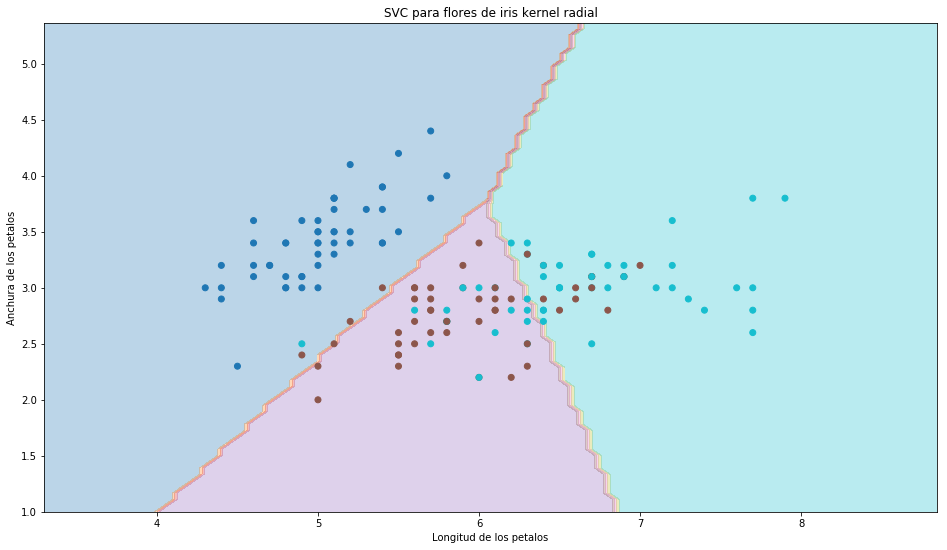

In [50]:
c = 0.01
svc = svm.SVC(kernel="rbf", C=c, decision_function_shape = 'ovr').fit(X,Y)
Ypred=svc.predict(x_plot)
Ypred=Ypred.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.contourf(xx, yy, Ypred, cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
plt.xlabel("Longitud de los petalos")
plt.ylabel("Anchura de los petalos")
plt.title("SVC para flores de iris kernel radial")

# Resumen final clasificacón de Iris

In [7]:
def svm_iris(C=1.0, gamma=0.01, kernel = "rbf"):
    import pandas as pd
    import numpy as np
    from sklearn import svm, datasets
    import matplotlib.pyplot as plt
    %matplotlib inline
    iris = datasets.load_iris()
    X = iris.data[:, :2]
    Y = iris.target
    
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    h = (x_max-x_min)/100

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))
    x_plot = np.c_[xx.ravel(), yy.ravel()]
    
    svc = svm.SVC(kernel=kernel, C=C, gamma=gamma, decision_function_shape = 'ovr').fit(X,Y)
    Ypred=svc.predict(x_plot)
    Ypred=Ypred.reshape(xx.shape)
    
    plt.figure(figsize=(16,9))
    plt.contourf(xx, yy, Ypred, cmap=plt.cm.tab10, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=plt.cm.tab10)
    plt.xlabel("Longitud de los petalos")
    plt.ylabel("Anchura de los petalos")
    plt.title("SVC para flores de iris kernel" + kernel)

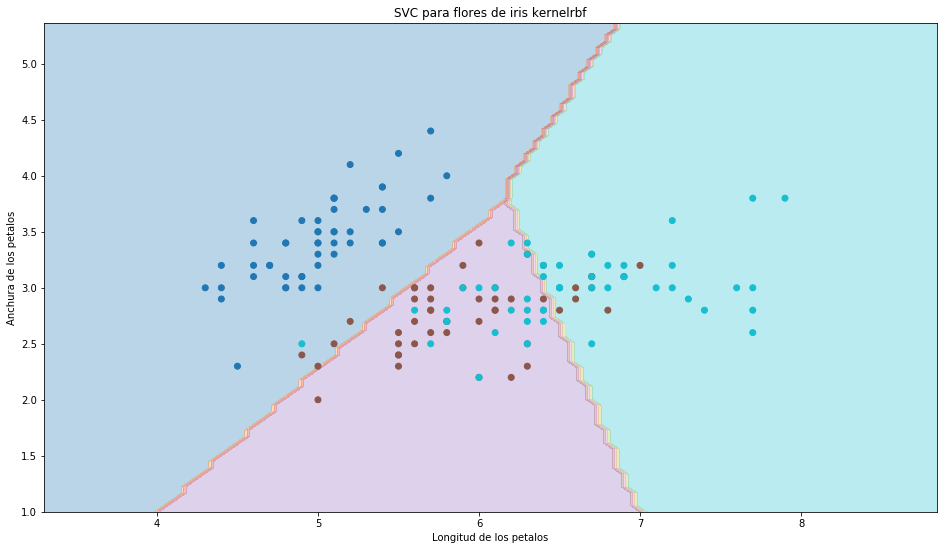

<function __main__.svm_iris>

In [25]:
from ipywidgets import widgets
from ipywidgets import interact, fixed

interact(svm_iris, C= [0.01, 0.1, 1, 10 , 100, 1000, 1e6, 1e10], 
                        gamma = [1e-5, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.5, 0.99],
                         kernel = ["rbf", "linear", "sigmoid", "poly"])